In [1]:
!pip install recommenders

     |████████████████████████████████| 339 kB 2.5 MB/s eta 0:00:01
  Using cached nltk-3.7-py3-none-any.whl (1.5 MB)
     |████████████████████████████████| 5.8 MB 14.8 MB/s eta 0:00:01
     |████████████████████████████████| 253 kB 47.6 MB/s eta 0:00:01
     |████████████████████████████████| 771 kB 22.2 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 116 kB/s eta 0:00:01
     |████████████████████████████████| 122 kB 31.0 MB/s eta 0:00:01
     |████████████████████████████████| 310 kB 27.9 MB/s eta 0:00:01
     |████████████████████████████████| 2.4 MB 58.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 20.7 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 6.2 MB/s  eta 0:00:01
     |████████████████████████████████| 118 kB 26.2 MB/s eta 0:00:01
     |████████████████████████████████| 9.6 MB 70.9 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 22.6 MB/s eta 0:00:01
     |████████████████████████████████| 243 kB 26.4 MB/s

     |████████████████████████████████| 3.8 MB 62.9 MB/s eta 0:00:01
     |████████████████████████████████| 182 kB 1.1 MB/s eta 0:00:01
  Using cached mypy_extensions-0.4.3-py2.py3-none-any.whl (4.5 kB)
     |████████████████████████████████| 532 kB 36.1 MB/s eta 0:00:01
  Using cached typing_extensions-4.4.0-py3-none-any.whl (26 kB)
  Created wheel for lightfm: filename=lightfm-1.16-cp38-cp38-macosx_10_9_x86_64.whl size=446310 sha256=03910d0f07dbba4f5ec2e50083a1fd24014c13d4f0e5fe2fbc061df629215332
  Stored in directory: /Users/zeba/Library/Caches/pip/wheels/ec/bb/51/9c487d021c1373b691d13cadca0b65b6852627b1f3f43550fa
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp38-cp38-macosx_10_9_x86_64.whl size=1180300 sha256=850ff5ee74a293a874f797ab14e0d26b62f70e76b9b25080fe9015540ce4f53d
  Stored in directory: /Users/zeba/Library/Caches/pip/wheels/af/db/86/2c18183a80ba05da35bf0fb7417aac5cddbd93bcb1b92fd3ea
Successfully built lightfm scikit-surprise
  Attempting uninstall: 

In [2]:
import os

from recommenders.models.newsrec.newsrec_utils import get_mind_data_set
from recommenders.models.deeprec.deeprec_utils import download_deeprec_resources
from tempfile import TemporaryDirectory

In [3]:
MIND_VERSION = 'demo'

In [4]:
mind_url, mind_train_dataset, mind_dev_dataset, mind_utils = get_mind_data_set(MIND_VERSION)

In [5]:
tmpdir = TemporaryDirectory()
data_path = tmpdir.name

train_news_file = os.path.join(data_path, 'train', r'news.tsv')
train_behaviors_file = os.path.join(data_path, 'train', r'behaviors.tsv')

valid_news_file = os.path.join(data_path, 'valid', r'news.tsv')
valid_behaviors_file = os.path.join(data_path, 'valid', r'behaviors.tsv')

if not os.path.exists(train_news_file):
    download_deeprec_resources(mind_url, os.path.join(data_path, 'train'), mind_train_dataset)
    
if not os.path.exists(valid_news_file):
    download_deeprec_resources(mind_url, \
                               os.path.join(data_path, 'valid'), mind_dev_dataset)

100%|█████████████████████████████████████| 17.0k/17.0k [00:10<00:00, 1.67kKB/s]
100%|█████████████████████████████████████| 9.84k/9.84k [00:03<00:00, 2.65kKB/s]


In [7]:
import pandas as pd

behaviors_col_names = ['ImpressionID', 'UserID', 'Time', 'History', 'Impressions']

train_data = pd.read_table(train_behaviors_file, header=None, names=behaviors_col_names)
valid_data = pd.read_table(valid_behaviors_file, header=None, names=behaviors_col_names)

def data_to_recommended_and_selected(dataframe: pd.DataFrame, user_col: str = 'UserID', interactions_col: str = 'Impressions'):
    data = list()
    items = set()
    for user, user_interactions in zip(dataframe[user_col].values, dataframe[interactions_col].values):
        
        # Interações são da forma noticia_id-clicado, exemplo: N23699-0 N21291-0 N1901-1 N27292-0 N17443-0

        R = [interaction.split('-')[0] for interaction in user_interactions.split()] 
        S = [interaction.split('-')[0] for interaction in user_interactions.split() if interaction[-1] == '1']
        
        items.update(R)

        data.append((user, ' '.join(R), ' '.join(S)))

    return pd.DataFrame(data, columns=['UserID', 'R', 'S']), items

train_data, train_items = data_to_recommended_and_selected(train_data)
valid_data, valid_items = data_to_recommended_and_selected(valid_data)

In [8]:
train_data

,UserID,R,S
0,U82271,N13390 N7180 N20785 N6937 N15776 N25810 N20820...,N15368
1,U84185,N13089 N18101 N1248 N26273 N12770 N1132 N13649,N12770
2,U11552,N18390 N10537 N23967,N23967
3,U68381,N15660 N18609 N2831 N5677 N19010 N1502 N19215 ...,N18390
4,U52303,N15645 N7911,N7911
...,...,...,...
22029,U69508,N16297 N15645 N20630 N10602 N27294 N24649 N129...,N9916
22030,U79085,N27355 N9809 N20882 N8787 N25926 N3864 N15163 ...,N13282
22031,U46989,N13316 N23592 N10240 N1994 N26998 N17157 N1324...,N13247
22032,U49050,N23982 N17424 N17157 N4324 N22216 N14332 N6221...,N13557 N7050 N18892


In [322]:
train_data['S'].apply(lambda x: len(x.split())).mean()

1.5068268998631937

# MIND Small

In [ ]:
import pandas as pd

In [26]:
data_path = '../MIND-small'

train_news_file = os.path.join(data_path, 'train', r'news.tsv')
train_behaviors_file = os.path.join(data_path, 'train', r'behaviors.tsv')

valid_news_file = os.path.join(data_path, 'dev', r'news.tsv')
valid_behaviors_file = os.path.join(data_path, 'dev', r'behaviors.tsv')

In [27]:
behaviors_col_names = ['ImpressionID', 'UserID', 'Time', 'History', 'Impressions']

train_data = pd.read_table(train_behaviors_file, header=None, names=behaviors_col_names)
valid_data = pd.read_table(valid_behaviors_file, header=None, names=behaviors_col_names)

def data_to_recommended_and_selected(dataframe: pd.DataFrame, user_col: str = 'UserID', interactions_col: str = 'Impressions'):
    data = list()
    items = set()
    for user, user_interactions in zip(dataframe[user_col].values, dataframe[interactions_col].values):
        
        # Interações são da forma noticia_id-clicado, exemplo: N23699-0 N21291-0 N1901-1 N27292-0 N17443-0

        R = [interaction.split('-')[0] for interaction in user_interactions.split()] 
        S = [interaction.split('-')[0] for interaction in user_interactions.split() if interaction[-1] == '1']
        
        items.update(R)

        data.append((user, ' '.join(R), ' '.join(S)))

    return pd.DataFrame(data, columns=['UserID', 'R', 'S']), items

train_data, train_items = data_to_recommended_and_selected(train_data)
valid_data, valid_items = data_to_recommended_and_selected(valid_data)

<AxesSubplot:ylabel='Frequency'>

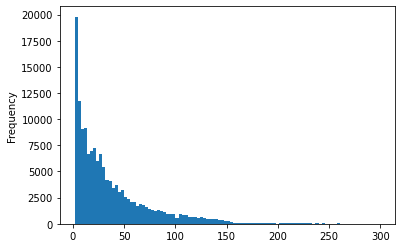

In [43]:
train_data['R'].apply(lambda x: len(x.split(' '))).plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

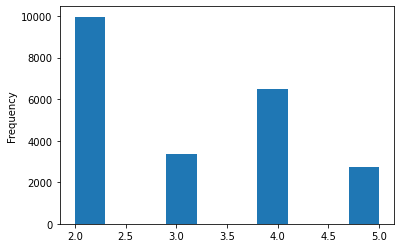

In [320]:
tst_s = train_data['R'].apply(lambda x: len(x.split(' ')))
tst_s[tst_s <= 5].plot.hist()

In [317]:
len(tst_s[tst_s <= 5])

22528

<AxesSubplot:ylabel='Frequency'>

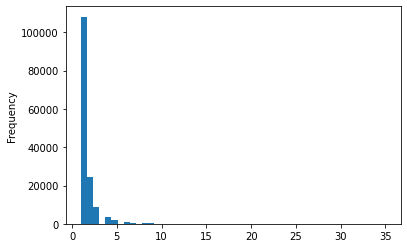

In [41]:
train_data['S'].apply(lambda x: len(x.split(' '))).plot.hist(bins=50)

In [42]:
train_data['S'].apply(lambda x: len(x.split(' '))).describe()

count    149116.000000
mean          1.506827
std           1.153562
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          35.000000
Name: S, dtype: float64

# $P_S$ TEst
- Criar o modelo pytorch
- Entender como computar a função de perda e treinar

Talvez usar máscara para dizer quais elementos estão em R e S.

Camada de embedding:
- Transformar itens e usuários em indices inteiros.


Loss:
- Entrada: 
    - batch com saídas da rede
    - Mascara target => indica quais elementos de K estão na mascara.
- Reduce => media => é a nivel de batch
- Produto interno saída x mascara e soma.


Possíveis jeitos de passar as entradas:
- 1:
    - X: NxK: 
    - y: NxK: mascara. 1 se item foi escolhido e 0 cc.
- 2:
    - Dataset cospe dicionarios {u, r, s} ou tuplas (u, r, s)
    - collate_fn junta essas entradas em um tensor com padding.


Tomar cuidado para não maximizar uma função que é de minimizar ou o contrário.


Checar tamanho de K


In [252]:
import time

import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import Dataset, DataLoader

In [139]:
def gen_code_dict(code_l):
    #gen_code_dict(list(df['UserID'].unique()))
    #gen_code_dict(" ".join(df['R']).split(" "))
    code_d = {}
    i = 1 # 0 eh PADDING
    for code in set(code_l):
        code_d[code] = i
        i += 1
    return code_d
    
class MIND_dataset(Dataset):
    def get_picked_inds(self, r, s):
        ind_l = []
        for picked_i in s:
            for ind, i in enumerate(r):
                if i == picked_i:
                    ind_l.append(ind)
                    break
        return ind_l


    def __init__(self, df, user_d, item_d):
        """
        Recebe um DataFrame com as colunas ['UserID', 'R', 'S']
        UserID: ids de usuario
        R: listas de ids de itens recomendados a U
        S: listas de ids de itens de R escolhidos por U
        
        user_d: dicionario que mapeia de id de usuário para numero inteiro, sendo que 0 é PAD
        item_d: dicionario que mapeia de id de item para numero inteiro, sendo que 0 é PAD
        """
        super().__init__()
        # Transformar os codigos de item e usuario em indices inteiros. 0 eh PADDING
        self.user_d = user_d
        self.item_d = item_d

        self.df = pd.DataFrame(index=df.index)
        self.df['U'] = df['UserID'].apply(lambda x: self.user_d[x])
        self.df['R'] = df['R'].apply(lambda x: [self.item_d[i] for i in x.split(' ')])
        # S
        self.df['S_picked'] = df['S'].apply(lambda x: [self.item_d[i] for i in x.split(' ')])
        self.df['S'] = self.df.apply(lambda x: self.get_picked_inds(x['R'], x['S_picked']), axis=1)
        
    def __getitem__(self, idx):
        '''
        Retorna uma tupla com U, R e S
        U => id do usuário
        R => lista de ids de itens
        S => lista de indices de R indicando quais itens foram escolhidos.
        '''
        return self.df['U'].iloc[idx], self.df['R'].iloc[idx], self.df['S'].iloc[idx]
    
    def __len__(self):
        return len(self.df)

    def get_n_users(self):
        return len(self.user_d)+1

    def get_n_items(self):
        return len(self.item_d)+1

def mind_collate_fn(data):
    '''
    Retorna tupla: u, r, r_mask, s
    '''
    batch_sz = len(data)
    max_len = max([len(r) for _,r,_ in data])

    u_batch = torch.zeros(batch_sz, 1, dtype=torch.long)
    r_batch = torch.zeros(batch_sz, max_len, dtype=torch.long)
    r_mask_batch = torch.zeros(batch_sz, max_len, dtype=torch.long)
    s_batch = torch.zeros(batch_sz, max_len, dtype=torch.long)

    for i, (u,r,s) in enumerate(data):
        u_batch[i] = u
        r_batch[i] = torch.LongTensor(r + [0]*(max_len-len(r)))
        r_mask_batch[i] = torch.LongTensor([1]*len(r) + [0]*(max_len-len(r)))
        s_batch[i] = torch.LongTensor([(1 if ind in s else 0) for ind in range(max_len)])
    return u_batch, r_batch, r_mask_batch, s_batch

In [87]:
import random
class MIND_P_R_Dataset(Dataset):
    def __init__(self, mind_ds, max_sampling_len):
        """
        Retorna amostras com negative sampling.
        mind_ds: MIND_Dataset
        """
        super().__init__()
        self.mind_ds = mind_ds
        self.item_set = set(mind_ds.item_d.values())
        self.max_sampling_len = max_sampling_len
    
    def __getitem__(self, idx):
        '''
        Retorna uma tupla com U, R_pos, R_neg
        U => id do usuário
        R_pos => lista de ids de itens em r para U amostrados
        R_neg => lista de ids de itens não em r para U amostrados
        '''
        u,r,_ = self.mind_ds[idx]
        pos_r = random.sample(r, min(self.max_sampling_len, len(r)))
        neg_r = random.sample(self.item_set - set(r), len(pos_r))
        return u, pos_r, neg_r
    
    def __len__(self):
        return len(self.mind_ds)
    
def mind_p_r_collate_fn(data):
    '''
    Retorna tupla: u, pos_r, pos_r_mask, neg_r, neg_r_mask
    '''
    batch_sz = len(data)
    pos_max_len = max([len(pos_r) for _,pos_r,_ in data])
    neg_max_len = max([len(neg_r) for _,_,neg_r in data])

    u_batch = torch.zeros(batch_sz, 1, dtype=torch.long)
    pos_r_batch = torch.zeros(batch_sz, pos_max_len, dtype=torch.long)
    pos_r_mask_batch = torch.zeros(batch_sz, pos_max_len, dtype=torch.long)
    neg_r_batch = torch.zeros(batch_sz, neg_max_len, dtype=torch.long)
    neg_r_mask_batch = torch.zeros(batch_sz, neg_max_len, dtype=torch.long)

    for i, (u, pos_r, neg_r) in enumerate(data):
        u_batch[i] = u
        pos_r_batch[i] = torch.LongTensor(pos_r + [0]*(pos_max_len-len(pos_r)))
        pos_r_mask_batch[i] = torch.LongTensor([1]*len(pos_r) + [0]*(pos_max_len-len(pos_r)))
        neg_r_batch[i] = torch.LongTensor(neg_r + [0]*(neg_max_len-len(neg_r)))
        neg_r_mask_batch[i] = torch.LongTensor([1]*len(neg_r) + [0]*(neg_max_len-len(neg_r)))
        
    return u_batch, pos_r_batch, pos_r_mask_batch, neg_r_batch, neg_r_mask_batch

In [217]:
class P_S_Network(nn.Module):
    def __init__(self, n_users, n_itens, K, emb_dim=32):
        super(P_S_Network, self).__init__()
        self.user_emb = nn.Embedding(num_embeddings=n_users, embedding_dim=emb_dim, padding_idx=0)
        self.item_emb = nn.Embedding(num_embeddings=n_itens, embedding_dim=emb_dim, padding_idx=0)
        self.w = nn.Parameter(torch.randn(1, K))
        self.K = K
        
    def forward(self, u, r, r_mask, s, beta):
        """
        Entrada:
            u: Indice do usuário
                torch.LongTensor(batch_sz, 1)
            r: Tensor de indices dos itens recomendados ao usuário
                torch.LongTensor(batch_sz, max_len)
            r_mask: Máscara binária indicando quais elementos de r não são padding
                torch.LongTensor(batch_sz, max_len)
            s: Máscara binária indicando quais elementos de r estão em s.
                torch.LongTensor(batch_sz, max_len)
            beta: Variavel exogena correspondente aos itens em r
                torch.tensor(batch_sz, max_len)
        """
        max_len = r.size(1)
        w_mul = beta * (self.w[:,:max_len])

        u_e = self.user_emb(u)
        i_e = self.item_emb(r)
        emb_sim = torch.bmm(u_e, i_e.permute(0,2,1)).squeeze()

        return (w_mul + emb_sim) * r_mask

def p_s_loss(out, s):
    # Loss to be minimized
    out_soft = F.log_softmax(out, dim=1)
    return -(out_soft*s).sum()

In [218]:
class P_R_Network(nn.Module):
    def __init__(self, n_users, n_itens, emb_dim=32):
        super(P_R_Network, self).__init__()
        self.user_emb = nn.Embedding(num_embeddings=n_users, embedding_dim=emb_dim, padding_idx=0)
        self.item_emb = nn.Embedding(num_embeddings=n_itens, embedding_dim=emb_dim, padding_idx=0)
        self.w = nn.Parameter(torch.randn(1, n_itens))
        
    def forward(self, u, r, r_mask, alpha):
        """
        Entrada:
            u: Indice do usuário
                torch.LongTensor(batch_sz, 1)
            r: Tensor de indices dos itens recomendados ao usuário
                torch.LongTensor(batch_sz, max_len)
            r_mask: Máscara binária indicando quais elementos de r não são padding
                torch.LongTensor(batch_sz, max_len)
            alpha: Variavel exogena correspondente aos itens em r
                torch.tensor(batch_sz, max_len)
        """
        # Seleciona os w correspondentes aos itens em r
        w_mul = alpha * (self.w[0,r])

        u_e = self.user_emb(u)
        i_e = self.item_emb(r)
        emb_sim = torch.bmm(u_e, i_e.permute(0,2,1)).squeeze()

        return (w_mul + emb_sim) * r_mask

def p_r_loss(pos_scores, neg_scores):
    """
    Negative sampling loss.
    Entrada:
        pos_scores: torch.tensor(batch_sz, pos_max_len)
        neg_scores: torch.tensor(batch_sz, neg_max_len)
    """
    # Loss to be minimized
    eps=1e-7
    pos_soft = F.logsigmoid(pos_scores).sum()
    neg_soft = torch.log(eps + 1 - torch.sigmoid(neg_scores)).sum()
    return -(pos_soft + neg_soft)

In [293]:
def ps_train_loop(dataloader, model, loss_fn, optimizer, device):
    agg_loss = 0.0
    size = len(dataloader.dataset)
    for batch, (u, r, r_mask, s) in enumerate(dataloader):
        u, r, r_mask, s = u.to(device), r.to(device), r_mask.to(device), s.to(device)
        
        batch_sz = u.size(0)
        max_len = r.size(1)
        beta = torch.randn(batch_sz, max_len).to(device)
        out = model(u, r, r_mask, s, beta)
        loss = loss_fn(out, s)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        agg_loss += loss.item()
        if batch % (len(dataloader)//10) == 0:
            loss, current = loss.item() / batch_sz, batch * len(u)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    return agg_loss / size

def ps_test_loop(dataloader, model, loss_fn, device):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for u, r, r_mask, s in dataloader:
            u, r, r_mask, s = u.to(device), r.to(device), r_mask.to(device), s.to(device)
            
            batch_sz = u.size(0)
            max_len = r.size(1)
            beta = torch.randn(batch_sz, max_len).to(device)
            out = model(u, r, r_mask, s, beta)
            test_loss += loss_fn(out, s).item() / batch_sz

    test_loss /= num_batches
    print(f"Test Error: Avg loss: {test_loss:>8f} \n")
    return test_loss

In [294]:
def pr_train_loop(dataloader, model, loss_fn, optimizer, device):
    agg_loss = 0.0
    size = len(dataloader.dataset)
    for batch, (u, pos_r, pos_r_mask, neg_r, neg_r_mask) in enumerate(dataloader):
        u, pos_r, pos_r_mask, neg_r, neg_r_mask = u.to(device), pos_r.to(device), pos_r_mask.to(device), neg_r.to(device), neg_r_mask.to(device)
        batch_sz = u.size(0)
        pos_max_len = pos_r.size(1)
        neg_max_len = neg_r.size(1)
        
        pos_alpha = torch.randn(batch_sz, pos_max_len).to(device)
        pos_scores = model(u, pos_r, pos_r_mask, pos_alpha)
        
        neg_alpha = torch.randn(batch_sz, neg_max_len).to(device)
        neg_scores = model(u, neg_r, neg_r_mask, neg_alpha)
        
        loss = loss_fn(pos_scores, neg_scores)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        agg_loss += loss.item()
        if batch % (len(dataloader)//10) == 0:
            loss, current = loss.item() / batch_sz, batch * len(u)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    return agg_loss / size

def pr_test_loop(dataloader, model, loss_fn, device):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for u, pos_r, pos_r_mask, neg_r, neg_r_mask in dataloader:
            u, pos_r, pos_r_mask, neg_r, neg_r_mask = u.to(device), pos_r.to(device), pos_r_mask.to(device), neg_r.to(device), neg_r_mask.to(device)
            batch_sz = u.size(0)
            pos_max_len = pos_r.size(1)
            neg_max_len = neg_r.size(1)
        
            pos_alpha = torch.randn(batch_sz, pos_max_len).to(device)
            pos_scores = model(u, pos_r, pos_r_mask, pos_alpha)
        
            neg_alpha = torch.randn(batch_sz, neg_max_len).to(device)
            neg_scores = model(u, neg_r, neg_r_mask, neg_alpha)
            
            test_loss += loss_fn(pos_scores, neg_scores).item() / batch_sz

    test_loss /= num_batches
    print(f"Test Error: Avg loss: {test_loss:>8f} \n")
    return test_loss

# Treinamento

In [173]:
# Pre-processamento
df_ids = list(range(len(train_data)))
random.shuffle(df_ids)
train_ids = df_ids[:int(len(train_data)*0.9)]
val_ids = df_ids[int(len(train_data)*0.9):]

train_df = train_data.iloc[train_ids]
val_df = train_data.iloc[val_ids]

user_d = gen_code_dict(list(train_df['UserID'].unique()))
item_d = gen_code_dict(" ".join(train_df['R']).split(" "))

item_check_s = val_df.apply(lambda x: x['R'].split() + x['S'].split(), axis=1).apply(lambda l: all([ i in item_d for i in l]))
user_check_s = val_df['UserID'].apply(lambda x: x in user_d)
val_df = val_df[item_check_s & user_check_s]
print('Treino : ', len(train_df))
print('Val : ', len(val_df))

Treino :  134204
Val :  12799


In [305]:
# Salvar datasets
train_df.to_csv('train_df.csv', index=False)
val_df.to_csv('val_df.csv', index=False)

# Salvar os dicts de usuario e item
pd.DataFrame({'code':user_d.keys(), 'indice':user_d.values()}).to_csv('user_d.csv', index=False)
pd.DataFrame({'code':item_d.keys(), 'indice':item_d.values()}).to_csv('item_d.csv', index=False)


In [221]:
# Datasets
batch_size = 32
p_r_max_sampling_len = 5

ps_train_ds = MIND_dataset(train_df, user_d, item_d)
ps_train_dl = DataLoader(ps_train_ds, batch_size=batch_size, shuffle=True, collate_fn=mind_collate_fn)

ps_val_ds = MIND_dataset(val_df, user_d, item_d)
ps_val_dl = DataLoader(ps_val_ds, batch_size=batch_size, shuffle=True, collate_fn=mind_collate_fn)


pr_train_ds = MIND_P_R_Dataset(ps_train_ds, p_r_max_sampling_len)
pr_train_dl = DataLoader(pr_train_ds, batch_size=batch_size, shuffle=True, collate_fn=mind_p_r_collate_fn)

pr_val_ds = MIND_P_R_Dataset(ps_val_ds, p_r_max_sampling_len)
pr_val_dl = DataLoader(pr_val_ds, batch_size=batch_size, shuffle=True, collate_fn=mind_p_r_collate_fn)

In [277]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


## $P_R$

In [336]:
pr_model = P_R_Network(len(user_d)+1, len(item_d)+1, emb_dim=2)
pr_model = pr_model.to(device)
print('P_R:')     
for name, param in pr_model.named_parameters():
    if param.requires_grad:
        print(name, param.data.size())
        print('Cuda = ', param.is_cuda)

P_R:
w torch.Size([1, 19762])
Cuda =  False
user_emb.weight torch.Size([47372, 2])
Cuda =  False
item_emb.weight torch.Size([19762, 2])
Cuda =  False


In [337]:
pr_save_path = 'pr_model.pth'
pr_loss_save_path = 'pr_loss.csv'
pr_loss_d = {'epoch': [], 'train':[], 'val':[]}
learning_rate = 1e-3
pr_optimizer = torch.optim.Adam(pr_model.parameters(), lr=learning_rate)

In [338]:
start_epoch = 0
end_epoch = 100

for epoch_n in range(start_epoch, end_epoch):
    start_time = time.time()
    print(f"Epoch {epoch_n+1}\n-------------------------------")
    train_loss = pr_train_loop(pr_train_dl, pr_model, p_r_loss, pr_optimizer, device)
    val_loss = pr_test_loop(pr_val_dl, pr_model, p_r_loss, device)
    print("--- %s seconds ---" % (time.time() - start_time))
    
    pr_loss_d['epoch'].append(epoch_n)
    pr_loss_d['train'].append(train_loss)
    pr_loss_d['val'].append(val_loss)
    if epoch_n % 3 == 0:
        torch.save(pr_model.state_dict(), pr_save_path)
        pd.DataFrame(pr_loss_d).to_csv(pr_loss_save_path, index=False)
torch.save(pr_model.state_dict(), pr_save_path)
pd.DataFrame(pr_loss_d).to_csv(pr_loss_save_path, index=False)

Epoch 1
-------------------------------
loss: 9.355070  [    0/134204]
loss: 9.482059  [13408/134204]
loss: 9.389542  [26816/134204]
loss: 9.793705  [40224/134204]
loss: 9.110896  [53632/134204]
loss: 10.155113  [67040/134204]
loss: 9.484844  [80448/134204]
loss: 8.386406  [93856/134204]
loss: 8.924614  [107264/134204]
loss: 9.012129  [120672/134204]
loss: 8.797543  [134080/134204]
Test Error: Avg loss: 8.616940 

--- 88.94117093086243 seconds ---
Epoch 2
-------------------------------
loss: 9.412569  [    0/134204]
loss: 8.852114  [13408/134204]
loss: 8.083759  [26816/134204]
loss: 8.635399  [40224/134204]
loss: 8.233234  [53632/134204]
loss: 8.452292  [67040/134204]
loss: 8.128329  [80448/134204]
loss: 8.070176  [93856/134204]
loss: 7.965114  [107264/134204]
loss: 8.370430  [120672/134204]
loss: 7.398675  [134080/134204]
Test Error: Avg loss: 8.134155 

--- 85.39404511451721 seconds ---
Epoch 3
-------------------------------
loss: 8.203048  [    0/134204]
loss: 7.533294  [13408/134

KeyboardInterrupt: 

In [339]:
torch.save(pr_model.state_dict(), pr_save_path)

In [282]:
loaded_pr_model = P_R_Network(len(user_d)+1, len(item_d)+1)
loaded_pr_model.load_state_dict(torch.load(pr_save_path))

<All keys matched successfully>

## $P_S$

In [329]:
ps_model = P_S_Network(len(user_d)+1, len(item_d)+1, 299, emb_dim=2)
ps_model = ps_model.to(device)
# Parametros
print('P_S:')
for name, param in ps_model.named_parameters():
    if param.requires_grad:
        print(name, param.data.size())
        print('Cuda = ', param.is_cuda)

P_S:
w torch.Size([1, 299])
Cuda =  False
user_emb.weight torch.Size([47372, 2])
Cuda =  False
item_emb.weight torch.Size([19762, 2])
Cuda =  False


In [330]:
ps_save_path = 'ps_model.pth'
ps_loss_save_path = 'ps_loss.csv'
ps_loss_d = {'epoch': [], 'train':[], 'val':[]}

In [331]:
learning_rate = 1e-3
ps_optimizer = torch.optim.Adam(ps_model.parameters(), lr=learning_rate)

In [332]:
start_epoch = 0
end_epoch = 100

for epoch_n in range(start_epoch, end_epoch):
    start_time = time.time()
    print(f"Epoch {epoch_n+1}\n-------------------------------")
    train_loss = ps_train_loop(ps_train_dl, ps_model, p_s_loss, ps_optimizer, device)
    val_loss = ps_test_loop(ps_val_dl, ps_model, p_s_loss, device)
    print("--- %s seconds ---" % (time.time() - start_time))
    
    ps_loss_d['epoch'].append(epoch_n)
    ps_loss_d['train'].append(train_loss)
    ps_loss_d['val'].append(val_loss)
    if epoch_n % 3 == 0:
        torch.save(ps_model.state_dict(), ps_save_path)
        pd.DataFrame(ps_loss_d).to_csv(ps_loss_save_path, index=False)
torch.save(ps_model.state_dict(), ps_save_path)
pd.DataFrame(ps_loss_d).to_csv(ps_loss_save_path, index=False)

Epoch 1
-------------------------------
loss: 8.110305  [    0/134204]
loss: 8.644269  [13408/134204]
loss: 9.303308  [26816/134204]
loss: 11.695631  [40224/134204]
loss: 6.665462  [53632/134204]
loss: 8.635054  [67040/134204]
loss: 8.467722  [80448/134204]
loss: 8.168361  [93856/134204]
loss: 6.936198  [107264/134204]
loss: 8.996063  [120672/134204]
loss: 6.380520  [134080/134204]
Test Error: Avg loss: 8.030035 

--- 21.246030807495117 seconds ---
Epoch 2
-------------------------------
loss: 5.973269  [    0/134204]
loss: 7.819653  [13408/134204]
loss: 7.993382  [26816/134204]
loss: 8.186760  [40224/134204]
loss: 7.592505  [53632/134204]
loss: 9.469425  [67040/134204]
loss: 8.610830  [80448/134204]
loss: 7.682830  [93856/134204]
loss: 7.398804  [107264/134204]
loss: 6.987427  [120672/134204]
loss: 10.432972  [134080/134204]
Test Error: Avg loss: 7.860832 

--- 24.433345079421997 seconds ---
Epoch 3
-------------------------------
loss: 9.469077  [    0/134204]
loss: 7.841794  [13408/

loss: 7.273869  [13408/134204]
loss: 4.805532  [26816/134204]
loss: 5.614279  [40224/134204]
loss: 6.731812  [53632/134204]
loss: 8.938831  [67040/134204]
loss: 5.361399  [80448/134204]
loss: 4.477597  [93856/134204]
loss: 7.022297  [107264/134204]
loss: 6.460247  [120672/134204]
loss: 7.137022  [134080/134204]
Test Error: Avg loss: 7.353835 

--- 23.387728929519653 seconds ---
Epoch 20
-------------------------------
loss: 5.690172  [    0/134204]
loss: 5.459897  [13408/134204]
loss: 8.454627  [26816/134204]
loss: 6.682551  [40224/134204]
loss: 7.139656  [53632/134204]
loss: 5.057953  [67040/134204]
loss: 7.213307  [80448/134204]
loss: 5.382449  [93856/134204]
loss: 6.232112  [107264/134204]
loss: 5.833234  [120672/134204]
loss: 4.754478  [134080/134204]
Test Error: Avg loss: 7.308398 

--- 21.397932052612305 seconds ---
Epoch 21
-------------------------------
loss: 7.997679  [    0/134204]
loss: 6.251961  [13408/134204]
loss: 8.244716  [26816/134204]
loss: 6.898548  [40224/134204]
l

KeyboardInterrupt: 

In [333]:
torch.save(ps_model.state_dict(), ps_save_path)

[Text(0.5, 0, 'Época'), Text(0, 0.5, 'Loss')]

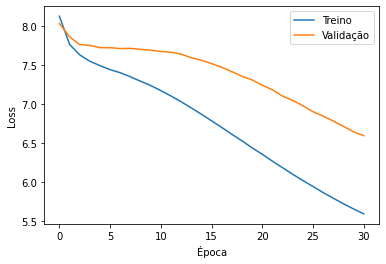

In [334]:
import seaborn as sns
ps_model_loss = pd.DataFrame(ps_loss_d)
aux_df = pd.DataFrame(index=ps_model_loss.index)
aux_df['Época'] = ps_model_loss['epoch']
aux_df['Treino'] = ps_model_loss['train']
aux_df['Validação'] = ps_model_loss['val']
aux_df = aux_df.set_index('Época')
ax = sns.lineplot(data=aux_df, dashes=False)
ax.set(xlabel='Época', ylabel='Loss')

In [289]:
loaded_ps_model = P_S_Network(len(user_d)+1, len(item_d)+1, 299)
loaded_ps_model.load_state_dict(torch.load(ps_save_path))

<All keys matched successfully>

# A FAZER

Pegar o dataset MIND SMALL

- Checar se as listas de impressao sao geralmente escolhidas do inicio
- Modificar modelo P_S.forward para receber beta como entrada. Ou criar um outro forward que pode ser usado com beta.
- Documentar rapidamente as entradas e saidas. E checar a classe Dataset.
- Implementar P_R
    - Ter um método que recebe tau, para a política gaussiana
- Treinar


Reduzir o tamanho das imp_logs, opções:
- Retirar todas que maiores que 5.
- Truncar as listas em tamanho 5, retirando as que não possuem S nos 5 primeiros
- Pegar os itens escolhidos e selecionar aleatoriamente mais outros para inteirar 5. Aleatorizar a ordem.
- Dividir a lista em menores, o que pode significar reutilizar o S várias vezes.

The negative samples are selected from the whole item set or the impression list. When optimizing 𝑝𝑹 and 𝑝𝑺 , we empirically set the learning rate as 0.001, and the user/item embedding sizes are both tunned in {16, 32, 64, 128, 256, 512}. The length of the impression list (i.e., |𝑹|) is set as 5, and the size of 𝑺 (i.e., 𝑘) is determined in {1, 2, 3}. The Gaussian policy is implemented as a two-layers fully- connected neural network, where the hidden dimension is searched in {16, 32, 64}.


In [342]:
# Dos usuarios em validacao, quantas vezes aparecem no treino?
train_df['UserID'].value_counts().mean()

2.833041312195225

<AxesSubplot:ylabel='Frequency'>

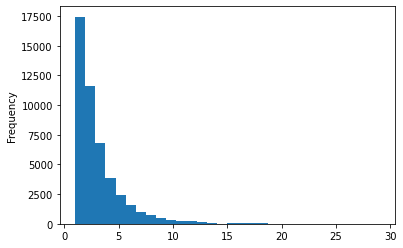

In [351]:
# Do
aux_df = train_df['UserID'].value_counts()
aux_df[aux_df<30].plot.hist(bins=30)

In [362]:
aux_df = pd.Series(" ".join(train_df['R']).split()).value_counts()
aux_df.mean()

253.00232781741815

<AxesSubplot:ylabel='Frequency'>

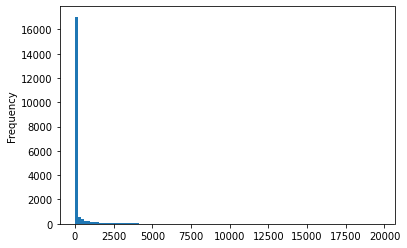

In [371]:
aux_df.plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

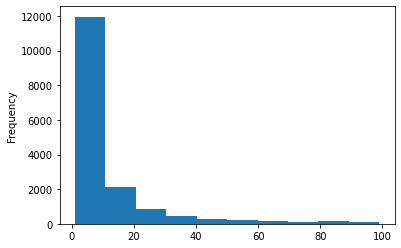

In [374]:
aux_df[aux_df < 100].plot.hist()

In [378]:
aux_df[aux_df < 100].median()

5.0

In [379]:
aux_df.median()

6.0

In [382]:
def pr_test_loop_scores(dataloader, model, loss_fn, device):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    
    pos_score_l = []
    neg_score_l = []

    with torch.no_grad():
        for u, pos_r, pos_r_mask, neg_r, neg_r_mask in dataloader:
            u, pos_r, pos_r_mask, neg_r, neg_r_mask = u.to(device), pos_r.to(device), pos_r_mask.to(device), neg_r.to(device), neg_r_mask.to(device)
            batch_sz = u.size(0)
            pos_max_len = pos_r.size(1)
            neg_max_len = neg_r.size(1)
        
            pos_alpha = torch.randn(batch_sz, pos_max_len).to(device)
            pos_scores = model(u, pos_r, pos_r_mask, pos_alpha)
            pos_score_l.append(pos_scores.data)
        
            neg_alpha = torch.randn(batch_sz, neg_max_len).to(device)
            neg_scores = model(u, neg_r, neg_r_mask, neg_alpha)
            neg_score_l.append(neg_scores.data)
            
            test_loss += loss_fn(pos_scores, neg_scores).item() / batch_sz

    test_loss /= num_batches
    print(f"Test Error: Avg loss: {test_loss:>8f} \n")
    return pos_score_l, neg_score_l

In [383]:
pos_score_l, neg_score_l = pr_test_loop_scores(pr_val_dl, pr_model, p_r_loss, device)

Test Error: Avg loss: 7.295546 



In [436]:
import random
class P_Re_Dataset(Dataset):
    def __init__(self, mind_ds):
        """
        Negative sampling
        mind_ds: MIND_Dataset
        """
        super().__init__()
        self.mind_ds = mind_ds
        self.item_set = set(mind_ds.item_d.values())
        
        df_d = {'u':[], 'pos_i':[], 'neg_i':[]}
        for i in range(len(mind_ds)):
            u = mind_ds[i][0]
            pos_r = mind_ds[i][1]
            neg_r = random.sample(self.item_set - set(pos_r), len(pos_r))
            for pos_i, neg_i in zip(pos_r, neg_r):
                df_d['u'].append(u)
                df_d['pos_i'].append(pos_i)
                df_d['neg_i'].append(neg_i)
                
        self.df = pd.DataFrame(df_d)
    
    def __getitem__(self, idx):
        return self.df['u'].iloc[idx], self.df['pos_i'].iloc[idx], self.df['neg_i'].iloc[idx]
    
    def __len__(self):
        return len(self.df)

In [437]:
class P_Re_Network(nn.Module):
    def __init__(self, n_users, n_itens, emb_dim=32):
        super(P_Re_Network, self).__init__()
        self.user_emb = nn.Embedding(num_embeddings=n_users, embedding_dim=emb_dim, padding_idx=0)
        self.item_emb = nn.Embedding(num_embeddings=n_itens, embedding_dim=emb_dim, padding_idx=0)
        self.w = nn.Parameter(torch.randn(n_itens))
        
    def forward(self, u, i, alpha):
        """
        Entrada:
            u: Indice do usuário
                torch.LongTensor(batch_sz)
            i: Indice do item
                torch.LongTensor(batch_sz)
            alpha: Variavel exogena correspondente aos itens em r
                torch.tensor(batch_sz)
        """
        # Seleciona os w correspondentes aos itens em r
        w_mul = alpha * self.w[i]

        u_e = self.user_emb(u)
        i_e = self.item_emb(i)
        emb_sim = (u_e * i_e).sum(dim=-1)

        return w_mul + emb_sim
    
def pre_loss_pos(pos_scores):
    return -F.logsigmoid(pos_scores).sum()

def pre_loss_neg(neg_scores):
    eps=1e-7
    return -torch.log(eps + 1 - torch.sigmoid(neg_scores)).sum()

In [476]:
def pre_train_loop(dataloader, model, loss_fn, optimizer, device, max_batch):
    agg_loss = 0.0
    num_samples = 0
    size = len(dataloader.dataset)
    for batch, (u, pos_i, neg_i) in enumerate(dataloader):
        if batch >= max_batch: break
        
        u, pos_i, neg_i = u.to(device), pos_i.to(device), neg_i.to(device)
        batch_sz = u.size(0)
        
        pos_alpha = torch.randn(batch_sz).to(device)
        pos_scores = model(u, pos_i, pos_alpha)
        
        neg_alpha = torch.randn(batch_sz).to(device)
        neg_scores = model(u, neg_i, neg_alpha)
        
        loss = loss_fn(pos_scores, neg_scores)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        agg_loss += loss.item()
        num_samples += batch_sz
        if batch % (max_batch//10) == 0:
            loss, current = loss.item() / batch_sz, batch * len(u)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    return agg_loss / num_samples

def pre_test_loop(dataloader, model, loss_fn, device, max_batch):
    size = len(dataloader.dataset)
    num_samples = 0
    test_loss, correct = 0, 0

    with torch.no_grad():
        for batch, (u, pos_i, neg_i) in enumerate(dataloader):
            if batch >= max_batch: break
            u, pos_i, neg_i = u.to(device), pos_i.to(device), neg_i.to(device)
            batch_sz = u.size(0)
        
            pos_alpha = torch.randn(batch_sz).to(device)
            pos_scores = model(u, pos_i, pos_alpha)
        
            neg_alpha = torch.randn(batch_sz).to(device)
            neg_scores = model(u, neg_i, neg_alpha)
        
            loss = loss_fn(pos_scores, neg_scores)
            
            test_loss += loss_fn(pos_scores, neg_scores).item()
            num_samples += batch_sz

    print(f"Test Error: Avg loss: {(test_loss/num_samples):>8f} \n")
    return test_loss / num_samples

In [440]:
%%time
batch_size = 64

pre_train_ds = P_Re_Dataset(ps_train_ds)
pre_train_dl = DataLoader(pre_train_ds, batch_size=batch_size, shuffle=True)

pre_val_ds = P_Re_Dataset(ps_val_ds)
pre_val_dl = DataLoader(pre_val_ds, batch_size=batch_size, shuffle=True)

CPU times: user 1min 11s, sys: 1.75 s, total: 1min 13s
Wall time: 1min 16s


In [478]:
pre_model = P_Re_Network(len(user_d)+1, len(item_d)+1, emb_dim=16)
pre_model = pre_model.to(device)
# Parametros
print('P_S:')
for name, param in pre_model.named_parameters():
    if param.requires_grad:
        print(name, param.data.size())
        print('Cuda = ', param.is_cuda)

P_S:
w torch.Size([19762])
Cuda =  False
user_emb.weight torch.Size([47372, 16])
Cuda =  False
item_emb.weight torch.Size([19762, 16])
Cuda =  False


In [479]:
pre_save_path = 'pre_model.pth'
pre_loss_save_path = 'pre_loss.csv'
pre_loss_d = {'epoch': [], 'train':[], 'val':[]}
learning_rate = 1e-3
pre_optimizer = torch.optim.Adam(pre_model.parameters(), lr=learning_rate)

In [480]:
start_epoch = 0
end_epoch = 100

for epoch_n in range(start_epoch, end_epoch):
    start_time = time.time()
    print(f"Epoch {epoch_n+1}\n-------------------------------")
    train_loss = pre_train_loop(pre_train_dl, pre_model, p_r_loss, pre_optimizer, device, 5000)
    val_loss = pre_test_loop(pre_val_dl, pre_model, p_r_loss, device, 2500)
    print("--- %s seconds ---" % (time.time() - start_time))
    
    pre_loss_d['epoch'].append(epoch_n)
    pre_loss_d['train'].append(train_loss)
    pre_loss_d['val'].append(val_loss)
    if epoch_n % 3 == 0:
        torch.save(pre_model.state_dict(), pre_save_path)
        pd.DataFrame(pre_loss_d).to_csv(pre_loss_save_path, index=False)
torch.save(pre_model.state_dict(), pre_save_path)
pd.DataFrame(pre_loss_d).to_csv(pre_loss_save_path, index=False)

Epoch 1
-------------------------------
loss: 3.938902  [    0/4999579]
loss: 3.483798  [32000/4999579]
loss: 3.080775  [64000/4999579]
loss: 3.007075  [96000/4999579]
loss: 3.057401  [128000/4999579]
loss: 3.701620  [160000/4999579]
loss: 2.546800  [192000/4999579]
loss: 3.355396  [224000/4999579]
loss: 4.221703  [256000/4999579]
loss: 3.072453  [288000/4999579]
Test Error: Avg loss: 3.226174 

--- 63.63712811470032 seconds ---
Epoch 2
-------------------------------
loss: 2.546291  [    0/4999579]
loss: 2.879390  [32000/4999579]
loss: 4.330765  [64000/4999579]
loss: 2.599682  [96000/4999579]
loss: 3.026182  [128000/4999579]
loss: 3.558590  [160000/4999579]
loss: 3.353308  [192000/4999579]
loss: 2.958835  [224000/4999579]
loss: 2.820065  [256000/4999579]
loss: 2.962604  [288000/4999579]
Test Error: Avg loss: 2.930450 

--- 67.27114582061768 seconds ---
Epoch 3
-------------------------------
loss: 3.557053  [    0/4999579]
loss: 2.891134  [32000/4999579]
loss: 3.006026  [64000/4999579

loss: 0.677300  [    0/4999579]
loss: 0.585319  [32000/4999579]
loss: 0.557023  [64000/4999579]
loss: 0.678131  [96000/4999579]
loss: 0.821555  [128000/4999579]
loss: 0.625015  [160000/4999579]
loss: 0.683911  [192000/4999579]
loss: 0.663392  [224000/4999579]
loss: 0.376247  [256000/4999579]
loss: 0.715403  [288000/4999579]
Test Error: Avg loss: 0.798455 

--- 68.46037197113037 seconds ---
Epoch 21
-------------------------------
loss: 0.444515  [    0/4999579]
loss: 0.388889  [32000/4999579]
loss: 0.429311  [64000/4999579]
loss: 0.509745  [96000/4999579]
loss: 0.608452  [128000/4999579]
loss: 0.565443  [160000/4999579]
loss: 0.562500  [192000/4999579]
loss: 0.464448  [224000/4999579]
loss: 0.726231  [256000/4999579]
loss: 0.545628  [288000/4999579]
Test Error: Avg loss: 0.754171 

--- 66.34579706192017 seconds ---
Epoch 22
-------------------------------
loss: 1.019266  [    0/4999579]
loss: 0.372928  [32000/4999579]
loss: 0.501230  [64000/4999579]
loss: 0.618015  [96000/4999579]
loss

KeyboardInterrupt: 

(0.0, 3.5)

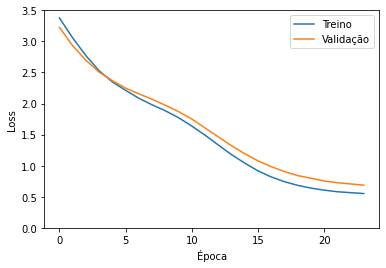

In [483]:
import seaborn as sns
df_model_loss = pd.DataFrame(pre_loss_d)
aux_df = pd.DataFrame(index=df_model_loss.index)
aux_df['Época'] = df_model_loss['epoch']
aux_df['Treino'] = df_model_loss['train']
aux_df['Validação'] = df_model_loss['val']
aux_df = aux_df.set_index('Época')
ax = sns.lineplot(data=aux_df, dashes=False)
ax.set(xlabel='Época', ylabel='Loss')
ax.set_ylim([0.0, 3.5])

# AUC to P_R

In [486]:
train_rec_by_u = train_df.groupby('UserID').apply(lambda x: (" ".join(x['R']).split()))

In [487]:
inv_user_d = {v:k for k,v in user_d.items()}
inv_item_d = {v:k for k,v in item_d.items()}

In [ ]:
u = 
pre_model

In [494]:
def pre_test_loop_scores(dataloader, model, loss_fn, device, max_batch):
    size = len(dataloader.dataset)
    num_samples = 0
    test_loss, correct = 0, 0
    
    pos_score_l = []
    neg_score_l = []

    with torch.no_grad():
        for batch, (u, pos_i, neg_i) in enumerate(dataloader):
            if batch >= max_batch: break
            u, pos_i, neg_i = u.to(device), pos_i.to(device), neg_i.to(device)
            batch_sz = u.size(0)
        
            pos_alpha = torch.randn(batch_sz).to(device)
            pos_scores = model(u, pos_i, pos_alpha)
            pos_score_l += [o.item() for o in pos_scores]
        
            neg_alpha = torch.randn(batch_sz).to(device)
            neg_scores = model(u, neg_i, neg_alpha)
            neg_score_l += [o.item() for o in neg_scores]
        
            loss = loss_fn(pos_scores, neg_scores)
            
            test_loss += loss_fn(pos_scores, neg_scores).item()
            num_samples += batch_sz

    print(f"Test Error: Avg loss: {(test_loss/num_samples):>8f} \n")
    return test_loss / num_samples, pos_score_l, neg_score_l

In [500]:
from sklearn.metrics import roc_auc_score

In [499]:
val_loss, pos_score_l, neg_score_l = pre_test_loop_scores(pre_val_dl, pre_model, p_r_loss, device, 1000)

Test Error: Avg loss: 0.683373 



In [501]:
true_y = [1]*len(pos_score_l) + [0]*len(neg_score_l)
pred_y = pos_score_l + neg_score_l
roc_auc_score(true_y, pred_y)

0.9316389858398437

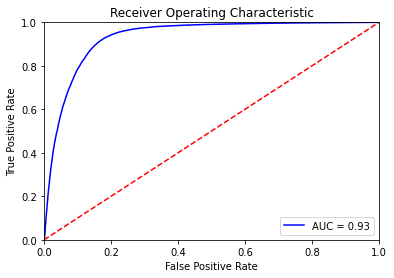

In [502]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(true_y, pred_y)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [477]:
%%time
pre_test_loop(pre_val_dl, pre_model, p_r_loss, device, 1000)

Test Error: Avg loss: 1.937667 

CPU times: user 1.98 s, sys: 62.9 ms, total: 2.04 s
Wall time: 2.09 s


1.9376668354272844

In [475]:
%%time
pre_train_loop(pre_train_dl, pre_model, p_r_loss, optimizer, device, 1000)

loss: 1.773284  [    0/4999579]
loss: 2.001065  [ 6400/4999579]
loss: 2.072268  [12800/4999579]
loss: 1.573009  [19200/4999579]
loss: 1.951164  [25600/4999579]
loss: 2.011803  [32000/4999579]
loss: 2.151156  [38400/4999579]
loss: 1.794920  [44800/4999579]
loss: 1.913135  [51200/4999579]
loss: 2.000658  [57600/4999579]
CPU times: user 11.8 s, sys: 812 ms, total: 12.6 s
Wall time: 7.14 s


1.8809014817476273

# P_S eficiente

Tentar diminuir o tamanho das listas

In [503]:
# aux_df = pd.Series(" ".join(train_df['R']).split()).value_counts()
# items_to_keep = list(aux_df[aux_df > 10].index)

In [524]:
import random
def reduced_r(s, r, max_len):
    if len(r) <= max_len:
        return r
    red_r = s[:max_len]
    red_r += random.sample(set(r) - set(red_r), max_len - len(red_r))
    return red_r

max_len_r = 20

In [510]:
train_df['R_l'] = train_df['R'].apply(lambda x: x.split())

/var/folders/2y/kyv2hdc1433f67fbbd7zm9zr0000gn/T/ipykernel_44627/1959355346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['R_l'] = train_df['R'].apply(lambda x: x.split())


In [536]:
train_df['S_l'] = train_df['S'].apply(lambda x: x.split())

/var/folders/2y/kyv2hdc1433f67fbbd7zm9zr0000gn/T/ipykernel_44627/879762617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['S_l'] = train_df['S'].apply(lambda x: x.split())


In [537]:
reduced_s = train_df.apply(lambda x: reduced_r(x['S_l'], x['R_l'], max_len_r), axis=1)

In [547]:
red_train_df = pd.DataFrame(index=train_df.index)
red_train_df['UserID'] = train_df['UserID']
red_train_df['S'] = train_df['S']
red_train_df['R'] = reduced_s.apply(lambda x: " ".join(x))

In [549]:
val_df['R_l'] = val_df['R'].apply(lambda x: x.split())
val_df['S_l'] = val_df['S'].apply(lambda x: x.split())
reduced_s = val_df.apply(lambda x: reduced_r(x['S_l'], x['R_l'], max_len_r), axis=1)

red_val_df = pd.DataFrame(index=val_df.index)
red_val_df['UserID'] = val_df['UserID']
red_val_df['S'] = val_df['S']
red_val_df['R'] = reduced_s.apply(lambda x: " ".join(x))

In [551]:
batch_size = 32

ps_train_ds = MIND_dataset(red_train_df, user_d, item_d)
ps_train_dl = DataLoader(ps_train_ds, batch_size=batch_size, shuffle=True, collate_fn=mind_collate_fn)

ps_val_ds = MIND_dataset(red_val_df, user_d, item_d)
ps_val_dl = DataLoader(ps_val_ds, batch_size=batch_size, shuffle=True, collate_fn=mind_collate_fn)

In [552]:
ps_model = P_S_Network(len(user_d)+1, len(item_d)+1, 299, emb_dim=16)
ps_model = ps_model.to(device)
# Parametros
print('P_S:')
for name, param in ps_model.named_parameters():
    if param.requires_grad:
        print(name, param.data.size())
        print('Cuda = ', param.is_cuda)

P_S:
w torch.Size([1, 299])
Cuda =  False
user_emb.weight torch.Size([47372, 16])
Cuda =  False
item_emb.weight torch.Size([19762, 16])
Cuda =  False


In [553]:
ps_save_path = 'ps_model.pth'
ps_loss_save_path = 'ps_loss.csv'
ps_loss_d = {'epoch': [], 'train':[], 'val':[]}
learning_rate = 1e-3
ps_optimizer = torch.optim.Adam(ps_model.parameters(), lr=learning_rate)

In [554]:
start_epoch = 0
end_epoch = 100

for epoch_n in range(start_epoch, end_epoch):
    start_time = time.time()
    print(f"Epoch {epoch_n+1}\n-------------------------------")
    train_loss = ps_train_loop(ps_train_dl, ps_model, p_s_loss, ps_optimizer, device)
    val_loss = ps_test_loop(ps_val_dl, ps_model, p_s_loss, device)
    print("--- %s seconds ---" % (time.time() - start_time))
    
    ps_loss_d['epoch'].append(epoch_n)
    ps_loss_d['train'].append(train_loss)
    ps_loss_d['val'].append(val_loss)
    if epoch_n % 3 == 0:
        torch.save(ps_model.state_dict(), ps_save_path)
        pd.DataFrame(ps_loss_d).to_csv(ps_loss_save_path, index=False)
torch.save(ps_model.state_dict(), ps_save_path)
pd.DataFrame(ps_loss_d).to_csv(ps_loss_save_path, index=False)

Epoch 1
-------------------------------
loss: 12.429979  [    0/134204]
loss: 10.088916  [13408/134204]
loss: 11.553240  [26816/134204]
loss: 12.440228  [40224/134204]
loss: 9.916104  [53632/134204]
loss: 6.989389  [67040/134204]
loss: 9.649977  [80448/134204]
loss: 8.700003  [93856/134204]
loss: 6.901362  [107264/134204]
loss: 9.948595  [120672/134204]
loss: 8.022299  [134080/134204]
Test Error: Avg loss: 9.061799 

--- 42.722081899642944 seconds ---
Epoch 2
-------------------------------
loss: 9.822528  [    0/134204]
loss: 10.435058  [13408/134204]
loss: 9.853220  [26816/134204]
loss: 7.288701  [40224/134204]
loss: 6.701733  [53632/134204]
loss: 9.515727  [67040/134204]
loss: 6.093030  [80448/134204]
loss: 8.153770  [93856/134204]
loss: 7.288787  [107264/134204]
loss: 7.824926  [120672/134204]
loss: 8.933782  [134080/134204]
Test Error: Avg loss: 7.665591 

--- 46.05034804344177 seconds ---
Epoch 3
-------------------------------
loss: 11.107541  [    0/134204]
loss: 15.305928  [13

KeyboardInterrupt: 

(0.0, 11.0)

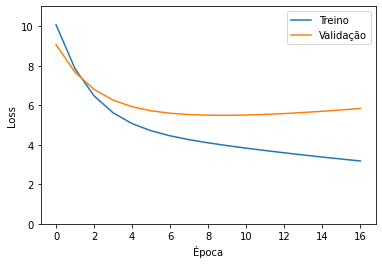

In [556]:
import seaborn as sns
ps_model_loss = pd.DataFrame(ps_loss_d)
aux_df = pd.DataFrame(index=ps_model_loss.index)
aux_df['Época'] = ps_model_loss['epoch']
aux_df['Treino'] = ps_model_loss['train']
aux_df['Validação'] = ps_model_loss['val']
aux_df = aux_df.set_index('Época')
ax = sns.lineplot(data=aux_df, dashes=False)
ax.set(xlabel='Época', ylabel='Loss')
ax.set_ylim([0.0, 11])

# P_S effective

Classficacao binaria
Recebe u e item e classifica como selecionar ou nao
Pos: s
Neg: em r mas nao em s

In [594]:
import random
class P_Se_Dataset(Dataset):
    def __init__(self, df, user_d, item_d):
        """
        Recebe um DataFrame com as colunas ['UserID', 'R', 'S']
        UserID: ids de usuario
        R: listas de ids de itens recomendados a U
        S: listas de ids de itens de R escolhidos por U
        
        user_d: dicionario que mapeia de id de usuário para numero inteiro, sendo que 0 é PAD
        item_d: dicionario que mapeia de id de item para numero inteiro, sendo que 0 é PAD
        """
        super().__init__()
        # Transformar os codigos de item e usuario em indices inteiros. 0 eh PADDING
        self.user_d = user_d
        self.item_d = item_d
        
        r_ser = df.groupby('UserID').apply(lambda x: " ".join(x['R']).split())
        s_ser = df.groupby('UserID').apply(lambda x: " ".join(x['S']).split())
        
        aux_df = pd.DataFrame(index=r_ser.index)
        aux_df['R'] = r_ser
        aux_df['S'] = s_ser
        aux_df['Neg'] = aux_df.apply(lambda x: set(x['R']) - set(x['S']), axis=1)
        
        aux_df['u'] = aux_df.apply(lambda x: user_d[x.name], axis=1)
        aux_df['pos'] = aux_df['S'].apply(lambda x: [item_d[i] for i in x])
        aux_df['neg'] = aux_df['Neg'].apply(lambda x: [item_d[i] for i in x])
        
        df_d = {'u':[], 'i':[], 'y':[]}    
        for row in aux_df.iterrows():
            row = row[1]
            u = row['u']
            for i in row['pos']:
                df_d['u'].append(u)
                df_d['i'].append(i)
                df_d['y'].append(1)
            for i in row['neg']:
                df_d['u'].append(u)
                df_d['i'].append(i)
                df_d['y'].append(0)
        self.df = pd.DataFrame(df_d)
    
    def __getitem__(self, idx):
        return self.df['u'].iloc[idx], self.df['i'].iloc[idx], self.df['y'].iloc[idx]
    
    def __len__(self):
        return len(self.df)

In [608]:
def pse_train_loop(dataloader, model, loss_fn, optimizer, device, max_batch):
    agg_loss = 0.0
    num_samples = 0
    size = len(dataloader.dataset)
    for batch, (u, it, y) in enumerate(dataloader):
        if batch >= max_batch: break
        
        u, it, y = u.to(device), it.to(device), y.to(device)
        batch_sz = u.size(0)
        
        beta = torch.randn(batch_sz).to(device)
        out = model(u, it, beta)
        loss = loss_fn(out, y.float())

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        agg_loss += loss.item()
        num_samples += batch_sz
        if batch % (max_batch//10) == 0:
            loss, current = loss.item() / batch_sz, batch * len(u)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    return agg_loss / num_samples

def pse_test_loop(dataloader, model, loss_fn, device, max_batch):
    size = len(dataloader.dataset)
    num_samples = 0
    test_loss, correct = 0, 0

    with torch.no_grad():
        for batch, (u, it, y) in enumerate(dataloader):
            if batch >= max_batch: break
            u, it, y = u.to(device), it.to(device), y.to(device)
            batch_sz = u.size(0)
        
            beta = torch.randn(batch_sz).to(device)
            out = model(u, it, beta)
            
            test_loss += loss_fn(out, y.float()).item()
            num_samples += batch_sz

    print(f"Test Error: Avg loss: {(test_loss/num_samples):>8f} \n")
    return test_loss / num_samples

In [611]:
%%time
batch_size = 32
pse_train_ds = P_Se_Dataset(train_df, user_d, item_d)
pse_train_dl = DataLoader(pse_train_ds, batch_size=batch_size, shuffle=True)

pse_val_ds = P_Se_Dataset(val_df, user_d, item_d)
pse_val_dl = DataLoader(pse_val_ds, batch_size=batch_size, shuffle=True)

CPU times: user 15.7 s, sys: 882 ms, total: 16.6 s
Wall time: 17.2 s


In [618]:
pse_model = P_Re_Network(len(user_d)+1, len(item_d)+1, emb_dim=16)
pse_model = pse_model.to(device)
# Parametros
print('PSE:')
for name, param in pse_model.named_parameters():
    if param.requires_grad:
        print(name, param.data.size())
        print('Cuda = ', param.is_cuda)

PSE:
w torch.Size([19762])
Cuda =  False
user_emb.weight torch.Size([47372, 16])
Cuda =  False
item_emb.weight torch.Size([19762, 16])
Cuda =  False


In [619]:
pse_save_path = 'pse_model.pth'
pse_loss_save_path = 'pse_loss.csv'
pse_loss_d = {'epoch': [], 'train':[], 'val':[]}
learning_rate = 1e-3
pse_optimizer = torch.optim.Adam(pse_model.parameters(), lr=learning_rate)

pse_loss = nn.BCEWithLogitsLoss(reduction='sum', pos_weight=torch.tensor([20.54]))

In [622]:
start_epoch = 30
end_epoch = 100

for epoch_n in range(start_epoch, end_epoch):
    start_time = time.time()
    print(f"Epoch {epoch_n+1}\n-------------------------------")
    train_loss = pse_train_loop(pse_train_dl, pse_model, pse_loss, pse_optimizer, device, 5000)
    val_loss = pse_test_loop(pse_val_dl, pse_model, pse_loss, device, 500)
    print("--- %s seconds ---" % (time.time() - start_time))
    
    pse_loss_d['epoch'].append(epoch_n)
    pse_loss_d['train'].append(train_loss)
    pse_loss_d['val'].append(val_loss)
    if epoch_n % 3 == 0:
        torch.save(pse_model.state_dict(), pse_save_path)
        pd.DataFrame(pse_loss_d).to_csv(pse_loss_save_path, index=False)
torch.save(pse_model.state_dict(), pse_save_path)
pd.DataFrame(pse_loss_d).to_csv(pse_loss_save_path, index=False)

Epoch 31
-------------------------------
loss: 1.127685  [    0/4352788]
loss: 2.698513  [16000/4352788]
loss: 2.273998  [32000/4352788]
loss: 0.730098  [48000/4352788]
loss: 0.639140  [64000/4352788]
loss: 0.351657  [80000/4352788]
loss: 1.095030  [96000/4352788]
loss: 0.376414  [112000/4352788]
loss: 4.033424  [128000/4352788]
loss: 1.031061  [144000/4352788]
Test Error: Avg loss: 1.604960 

--- 56.72748303413391 seconds ---
Epoch 32
-------------------------------
loss: 2.794420  [    0/4352788]
loss: 0.326243  [16000/4352788]
loss: 0.394947  [32000/4352788]
loss: 4.481590  [48000/4352788]
loss: 0.735965  [64000/4352788]
loss: 0.549798  [80000/4352788]
loss: 1.321179  [96000/4352788]
loss: 3.640697  [112000/4352788]
loss: 0.694832  [128000/4352788]
loss: 0.525276  [144000/4352788]
Test Error: Avg loss: 1.500061 

--- 54.04053020477295 seconds ---
Epoch 33
-------------------------------
loss: 1.194293  [    0/4352788]
loss: 1.451229  [16000/4352788]
loss: 1.024484  [32000/4352788]
l

KeyboardInterrupt: 

Avaliacao P_S

(0.0, 3.5)

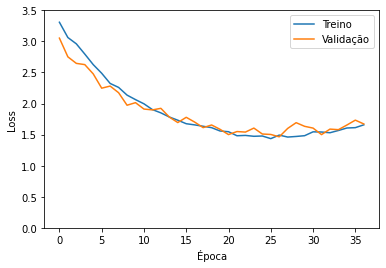

In [623]:
import seaborn as sns
df_model_loss = pd.DataFrame(pse_loss_d)
aux_df = pd.DataFrame(index=df_model_loss.index)
aux_df['Época'] = df_model_loss['epoch']
aux_df['Treino'] = df_model_loss['train']
aux_df['Validação'] = df_model_loss['val']
aux_df = aux_df.set_index('Época')
ax = sns.lineplot(data=aux_df, dashes=False)
ax.set(xlabel='Época', ylabel='Loss')
ax.set_ylim([0.0, 3.5])

In [615]:
def pse_test_loop_scores(dataloader, model, loss_fn, device, max_batch):
    size = len(dataloader.dataset)
    num_samples = 0
    test_loss, correct = 0, 0
    score_l = []
    y_l = []

    with torch.no_grad():
        for batch, (u, it, y) in enumerate(dataloader):
            if batch >= max_batch: break
            u, it, y = u.to(device), it.to(device), y.to(device)
            batch_sz = u.size(0)
        
            beta = torch.randn(batch_sz).to(device)
            out = model(u, it, beta)
            
            score_l += [o.item() for o in out]
            y_l += [o.item() for o in y]
            
            test_loss += loss_fn(out, y.float()).item()
            num_samples += batch_sz

    print(f"Test Error: Avg loss: {(test_loss/num_samples):>8f} \n")
    return test_loss / num_samples, score_l, y_l

In [621]:
val_loss, score_l, y_l = pse_test_loop_scores(pse_val_dl, pse_model, pse_loss, device, 1000)
true_y = y_l
pred_y = score_l
roc_auc_score(true_y, pred_y)

Test Error: Avg loss: 1.588334 



0.6112007417207855

In [616]:
val_loss, score_l, y_l = pse_test_loop_scores(pse_val_dl, pse_model, pse_loss, device, 1000)
true_y = y_l
pred_y = score_l
roc_auc_score(true_y, pred_y)

Test Error: Avg loss: 0.010116 



0.6400414442865919

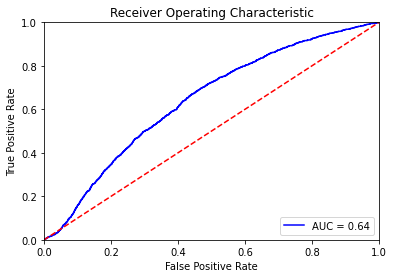

In [617]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(true_y, pred_y)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [591]:
tst_df = pd.DataFrame(df_d)

In [592]:
tst_df['y'].value_counts()

0    4150785
1     202003
Name: y, dtype: int64

In [ ]:
4150785 / 202003 #20.54813542373133